In [6]:
import pandas as pd

# Cargar los datos
df1 = pd.read_csv('grupo1.csv')
df2 = pd.read_csv('grupo2.csv')
df3 = pd.read_csv('grupo3.csv')

# Visualizar las primeras filas de cada dataframe
print(df1.head())
print(df2.head())
print(df3.head())

   HorasEstudio  Calificacion
0         20.00         75.94
1         15.60         87.48
2         17.91         79.40
3         20.00         73.37
4         20.00         83.75
   HorasEstudio  Calificacion
0          3.79          40.0
1          6.08          26.1
2          7.17          29.0
3          7.54          31.9
4          8.18          34.8
   HorasEstudio  Calificacion
0          3.79          15.0
1          6.08          26.1
2          7.17          29.0
3          7.54          31.9
4          8.18          34.8


       HorasEstudio  Calificacion
count     50.000000      50.00000
mean      14.352000      83.78820
std        4.219174       7.83389
min        3.790000      68.46000
25%       12.032500      78.03500
50%       14.600000      84.49000
75%       17.715000      88.09000
max       20.000000     100.00000
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.912000
std        4.219174     20.668922
min        3.790000     26.100000
25%       12.032500     63.500000
50%       14.600000     78.550000
75%       17.715000     93.300000
max       20.000000     99.000000
       HorasEstudio  Calificacion
count     50.000000     50.000000
mean      14.352000     75.968000
std        4.219174     23.668867
min        3.790000     15.000000
25%       12.032500     61.000000
50%       14.600000     84.950000
75%       17.715000     94.375000
max       20.000000     99.000000


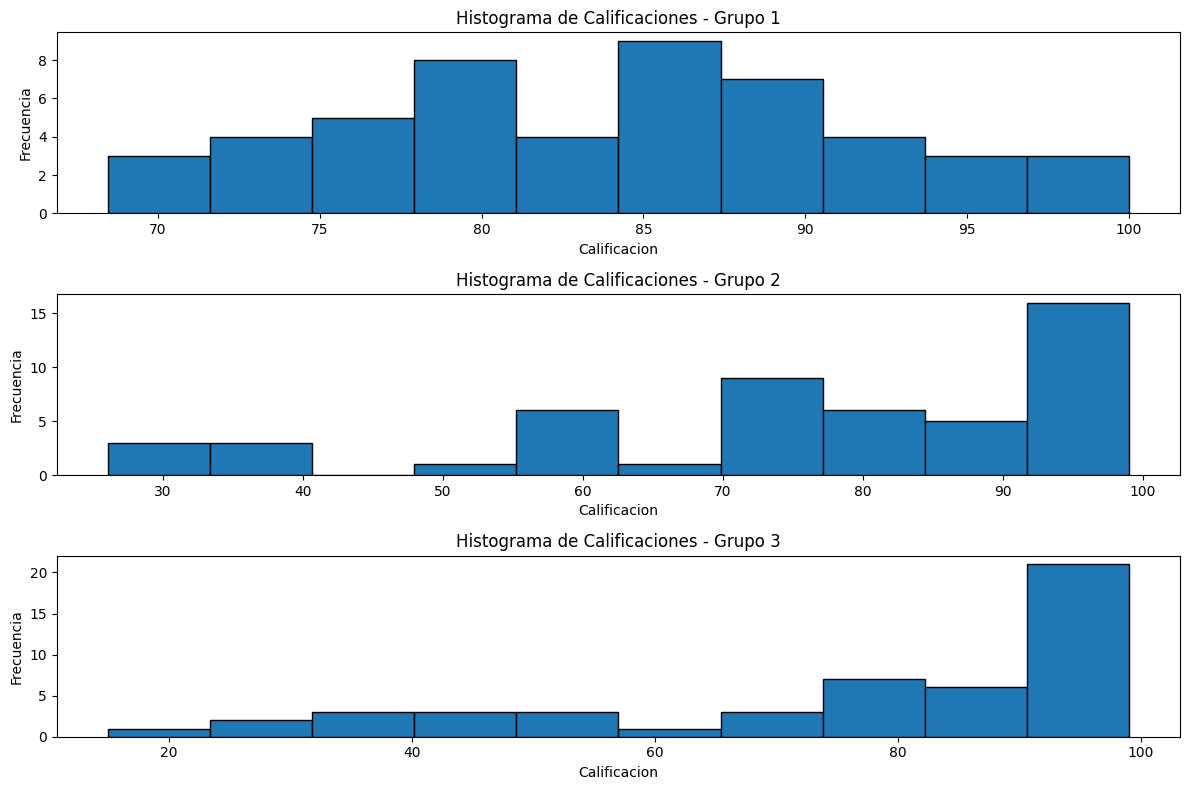

In [7]:
# Descripción estadística
print(df1.describe())
print(df2.describe())
print(df3.describe())

# Histograma de calificaciones
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.hist(df1['Calificacion'], bins=10, edgecolor='black')
plt.title('Histograma de Calificaciones - Grupo 1')
plt.xlabel('Calificacion')
plt.ylabel('Frecuencia')

plt.subplot(3, 1, 2)
plt.hist(df2['Calificacion'], bins=10, edgecolor='black')
plt.title('Histograma de Calificaciones - Grupo 2')
plt.xlabel('Calificacion')
plt.ylabel('Frecuencia')

plt.subplot(3, 1, 3)
plt.hist(df3['Calificacion'], bins=10, edgecolor='black')
plt.title('Histograma de Calificaciones - Grupo 3')
plt.xlabel('Calificacion')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

# Función para entrenar el modelo y obtener los coeficientes
def entrenar_modelo(df):
    X = df['HorasEstudio'].values.reshape(-1, 1)
    y = df['Calificacion'].values
    modelo = LinearRegression()
    modelo.fit(X, y)
    pendiente = modelo.coef_[0]
    intercepto = modelo.intercept_
    return modelo, pendiente, intercepto

modelo1, pendiente1, intercepto1 = entrenar_modelo(df1)
modelo2, pendiente2, intercepto2 = entrenar_modelo(df2)
modelo3, pendiente3, intercepto3 = entrenar_modelo(df3)

print(f"Grupo 1: Pendiente = {pendiente1}, Intercepto = {intercepto1}")
print(f"Grupo 2: Pendiente = {pendiente2}, Intercepto = {intercepto2}")
print(f"Grupo 3: Pendiente = {pendiente3}, Intercepto = {intercepto3}")

Grupo 1: Pendiente = -0.10608151145860807, Intercepto = 85.31068185245395
Grupo 2: Pendiente = 4.222718653627889, Intercepto = 15.30754188313253
Grupo 3: Pendiente = 5.285670950508442, Intercepto = 0.10805051830283219


In [10]:
from scipy.stats import pearsonr

# Función para calcular el coeficiente de correlación de Pearson
def calcular_correlacion(df):
    return pearsonr(df['HorasEstudio'], df['Calificacion'])

correlacion1, p_valor1 = calcular_correlacion(df1)
correlacion2, p_valor2 = calcular_correlacion(df2)
correlacion3, p_valor3 = calcular_correlacion(df3)

print(f"Grupo 1: Coeficiente de correlación = {correlacion1}, Valor p = {p_valor1}")
print(f"Grupo 2: Coeficiente de correlación = {correlacion2}, Valor p = {p_valor2}")
print(f"Grupo 3: Coeficiente de correlación = {correlacion3}, Valor p = {p_valor3}")

Grupo 1: Coeficiente de correlación = -0.057133344466469345, Valor p = 0.6935088469237525
Grupo 2: Coeficiente de correlación = 0.861989042650508, Valor p = 9.07771423368798e-16
Grupo 3: Coeficiente de correlación = 0.9422151342073145, Valor p = 1.9341524231025037e-24


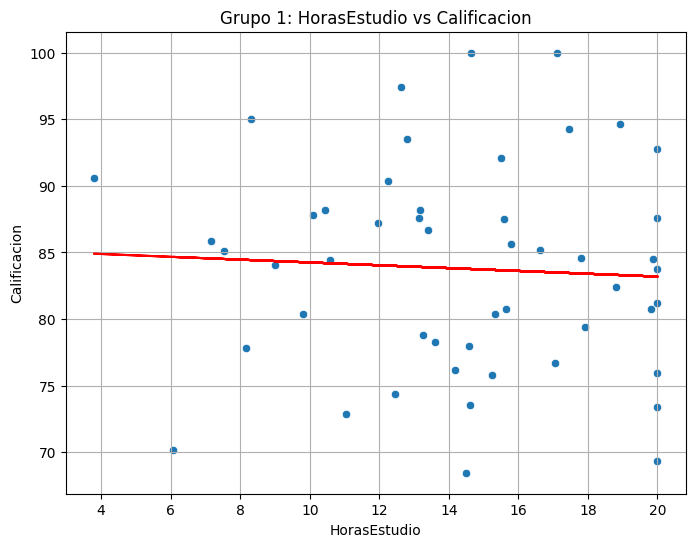

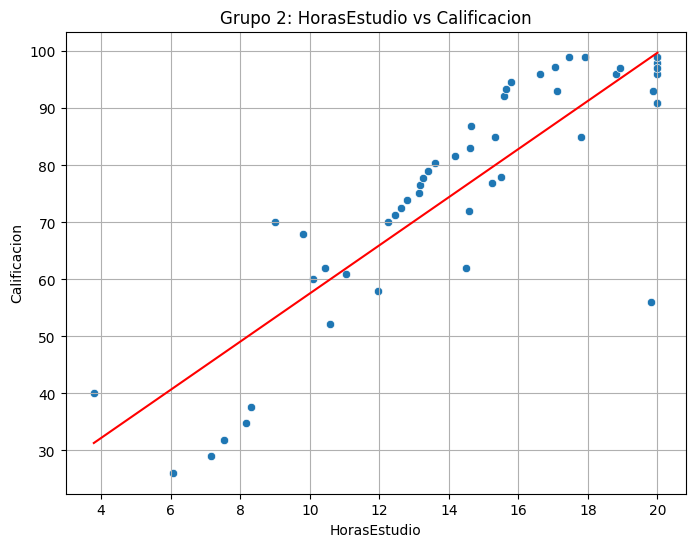

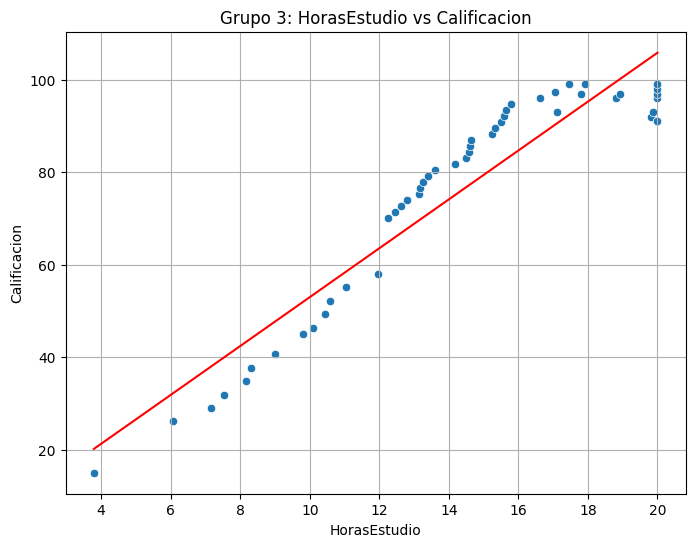

In [12]:
import seaborn as sns

# Función para graficar los datos y la línea de regresión
def graficar_regresion(df, modelo, titulo):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='HorasEstudio', y='Calificacion', data=df)
    plt.plot(df['HorasEstudio'], modelo.predict(df['HorasEstudio'].values.reshape(-1, 1)), color='red')
    plt.title(titulo)
    plt.xlabel('HorasEstudio')
    plt.ylabel('Calificacion')
    plt.grid(True)
    plt.show()

graficar_regresion(df1, modelo1, 'Grupo 1: HorasEstudio vs Calificacion')
graficar_regresion(df2, modelo2, 'Grupo 2: HorasEstudio vs Calificacion')
graficar_regresion(df3, modelo3, 'Grupo 3: HorasEstudio vs Calificacion')

#### 1. Interpretación del coeficiente de regresión
El coeficiente de regresión (pendiente) indica el cambio en la calificación final por cada hora adicional de estudio. Una pendiente positiva sugiere que a medida que aumenta el tiempo de estudio, también aumentan las calificaciones finales.

#### 2. Interpretación del coeficiente de correlación
El coeficiente de correlación de Pearson mide la fuerza y la dirección de la relación lineal entre dos variables. Un valor cercano a 1 indica una fuerte relación positiva, mientras que un valor cercano a -1 indica una fuerte relación negativa. Un valor cercano a 0 indica una relación débil o nula.

#### 3. Significancia estadística del modelo de regresión
Para determinar si el modelo de regresión es estadísticamente significativo, observamos el valor p asociado con el coeficiente de correlación. Un valor p menor a 0.05 sugiere que la relación observada es significativa.

#### 4. Confiabilidad del modelo de regresión
La confiabilidad del modelo de regresión para predecir las calificaciones finales se puede evaluar mediante el coeficiente de determinación (R²), el cual indica el porcentaje de variabilidad en la variable dependiente que es explicado por la variable independiente. Un valor R² alto indica un modelo más confiable.

#### Conclusion general
Me es interesante como los graficos scatter plot son tan diferentes pero a la vez tan explicativos que otro tipo de modelos mas graficos, podria decir que seria mas preciso para graficar datos mas complejos y a su vez pienso usarlos para representar databases de mysql